# Gender bias in Bioinformatics

This notebook shows a series of analyses conducted to study gender bians in bioinformatics. By talking the case of studies of the five most important journals in the area (nucleids acid research, bmc genomics, bmc bioinformatics, oxford bioinformatics, plos computational biology) we analyze bias in the autorship of the papers.

In [1]:
%matplotlib inline

# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind

os.chdir('..')

from db_manager import DBManager

plt.style.use('seaborn')

In [2]:
# Save current dir in case it can be useful
project_dir = os.getcwd()

# Data load

In [105]:
papers = pd.read_csv(project_dir + '/data/papers.csv')
authors = pd.read_csv(project_dir + '/data/authors.csv')
papers_authors = pd.read_csv(project_dir + '/data/papers_authors.csv')

In [106]:
print("Raw data:\n-", papers.shape[0], " Papers\n-", authors.shape[0], "Authors\n-", papers_authors.shape[0], 
      "Paper-Authors")

Raw data:
- 38349  Papers
- 120855 Authors
- 213147 Paper-Authors


## Remove papers without authors

In [109]:
papers_without_authors = papers[(papers['authors']==0)|(pd.isna(papers['authors']))]
print("Papers without authors " + str(papers_without_authors.shape[0]) + " (most of these are papers " \
      "whose authors have an unidentified gender)")

Papers without authors 1624 (most of these are papers whose authors have an unidentified gender)


In [110]:
papers = papers[(papers['authors']!=0)&(pd.notnull(papers['authors']))]
print("Papers with authors " + str(papers.shape[0]))

Papers with authors 36725


In [111]:
# Remove from papers authors dataset those papers without author
papers_authors = papers_authors[~papers_authors['title'].isin(papers_without_authors)]
papers_authors.shape[0]

213147

## Remove authors with unidentified gender

In [113]:
print("There are " + str(authors[(authors['gender']!='male')&(authors['gender']!='female')].shape[0]) +
      " authors with unidentified gender")

There are 20065 authors with unidentified gender


### Filter out authors with unidentified gender

In [114]:
authors = authors[(authors['gender']=='male')|(authors['gender']=='female')]
authors.shape[0]

100790

In [115]:
# Remove rows that have author with unidentified gender
papers_authors = papers_authors[(papers_authors['author_gender']=='male')|
                                (papers_authors['author_gender']=='female')]
papers_authors.shape[0]

174615

# Papers

In [116]:
print("Total papers: " + str(papers.shape[0]))

Total papers: 36725


## Data structure

In [117]:
papers.head()

,id,title,DOI,year,source,citations,edamCategory,link,authors,gender_last_author
0,1,A peptide-based method for 13C Metabolic Flux ...,10.1371/journal.pcbi.1003827,2014,plos computational biology,7,Omics > Genomics > Transcriptomics,https://journals.plos.org/ploscompbiol/article...,8.0,male
1,2,Baseline CD4+ T cell counts correlates with HI...,10.1371/journal.pcbi.1003830,2014,plos computational biology,0,Computational Biology > Phylogeny,https://journals.plos.org/ploscompbiol/article...,9.0,male
2,3,Evolution of the F0F1 ATP Synthase Complex in ...,10.1371/journal.pcbi.1003821,2014,plos computational biology,8,Computational Biology > Structure analysis,https://journals.plos.org/ploscompbiol/article...,2.0,female
3,4,Dynamic Modelling of Pathways to Cellular Sene...,10.1371/journal.pcbi.1003728,2014,plos computational biology,12,Computational Biology > Phylogeny,https://journals.plos.org/ploscompbiol/article...,7.0,male
4,5,Unbiased Functional Clustering of Gene Variant...,10.1371/journal.pcbi.1003815,2014,plos computational biology,7,Omics > Genomics > Functional genomics,https://journals.plos.org/ploscompbiol/article...,3.0,male


## Evolution of papers by year

In [118]:
papers_by_year = papers.groupby('year').size()

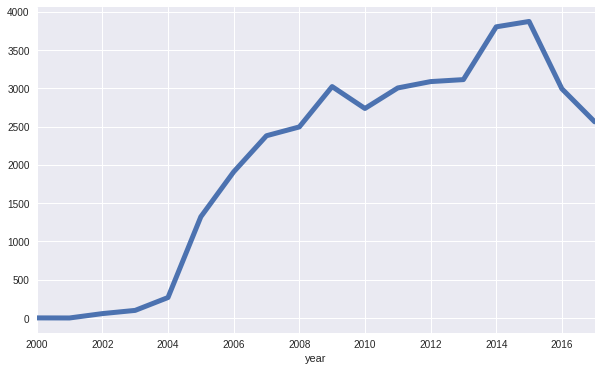

In [119]:
plt.figure(figsize=(10,6))
papers_by_year.plot(lw=5)

## Evolution of average citations over years

In [120]:
papers['citations'].describe()

count    36725.000000
mean        33.465432
std        131.031926
min          0.000000
25%          5.000000
50%         13.000000
75%         31.000000
max       9753.000000
Name: citations, dtype: float64

### Paper with max citation

In [121]:
papers[papers['citations']==max(papers['citations'])].head()

,id,title,DOI,year,source,citations,edamCategory,link,authors,gender_last_author
34840,34841,The Sequence Alignment/Map format and SAMtools,10.1093/bioinformatics/btp352,2009,oxford bioinformatics,9753,Omics > Genomics > Proteomics,https://academic.oup.com/bioinformatics/articl...,8.0,male


### Average citations over years

In [122]:
avg_citations_by_year = papers.groupby('year').mean()['citations']

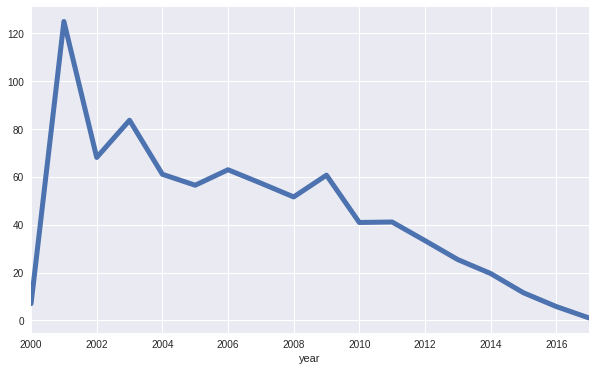

In [123]:
plt.figure(figsize=(10,6))
avg_citations_by_year.plot(lw=5)

## Average authors over years

In [124]:
papers['authors'].describe()

count    36725.000000
mean         4.755916
std          3.661517
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max        130.000000
Name: authors, dtype: float64

### Paper with max number of authors

In [125]:
papers[papers['authors']==max(papers['authors'])].head()

,id,title,DOI,year,source,citations,edamCategory,link,authors,gender_last_author
19896,19897,"The H-Invitational Database (H-InvDB), a compr...",10.1093/nar/gkm999,2008,nucleic acids research,54,Computational Biology > Sequence analysis,https://academic.oup.com/nar/article/36/suppl_...,130.0,male


### Average number of authors over years

In [126]:
avg_authors_by_year = papers.groupby('year').mean()['authors']

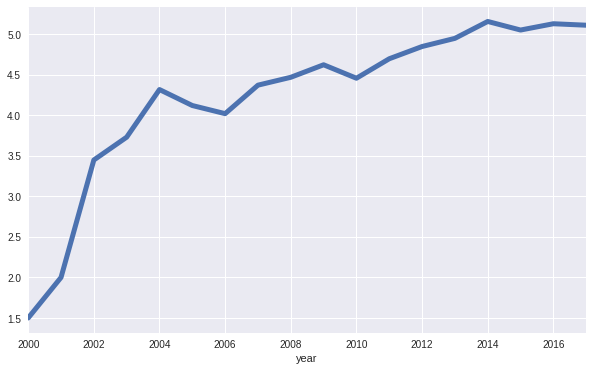

In [127]:
plt.figure(figsize=(10,6))
avg_authors_by_year.plot(lw=5)

## Categories

In [128]:
row_categories = papers['edamCategory']
categories = []
for row_category in row_categories:
    for category in row_category.split('>'):
        clean_category = category.strip()
        exists_category_dict = False
        for category_dict in categories:
            if category_dict['category_name'] == clean_category:
                category_dict['count'] += 1
                exists_category_dict = True
                break
        if not exists_category_dict:
            categories.append(
                {
                    'category_name': clean_category,
                    'count': 1
                }
            )

In [129]:
categories_df = pd.DataFrame(categories)
total_categories = categories_df.shape[0]
print("There are " + str(total_categories) + " categories")
categories_df.sort_values('count', inplace=True, ascending=False)
categories_df.head()

There are 18 categories


,category_name,count
3,Computational Biology,23253
0,Omics,12043
1,Genomics,12043
7,Nucleic acids,6375
6,Functional genomics,5088


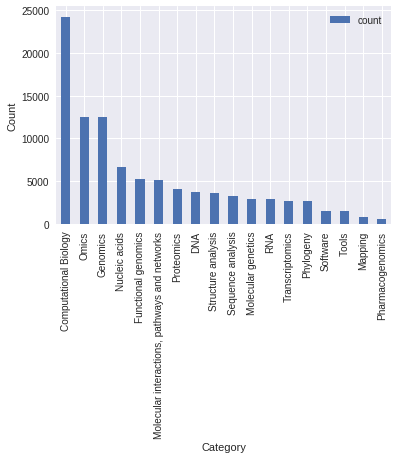

In [20]:
categories_df.plot.bar(x='category_name', y='count')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## Source

In [130]:
papers_by_source = papers.groupby('source').size().sort_values(ascending=False)

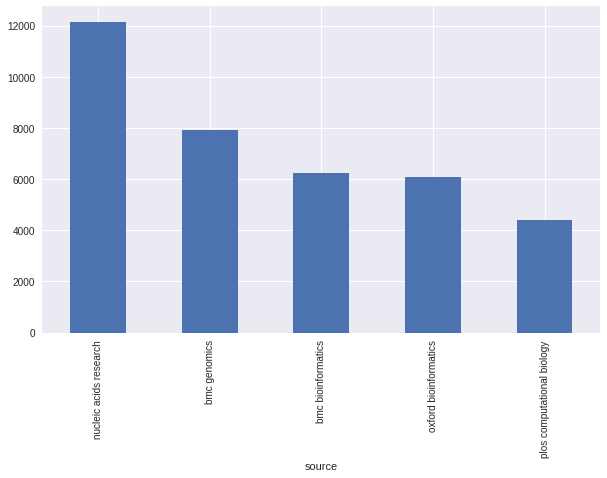

In [131]:
plt.figure(figsize=(10,6))
papers_by_source.plot(kind='bar')

# Authors

In [132]:
print("Total authors: " + str(authors.shape[0]))

Total authors: 100790


## Data structure

In [133]:
authors.head()

,id,name,gender,papers,total_citations,papers_as_first_author,papers_as_last_author,papers_with_citations,h-index
0,1,Amit Ghosh,male,3,21,1,0,3,2
1,2,Jerome Nilmeier,male,1,7,0,0,1,1
2,3,Paul D Adams,male,3,92,0,0,3,3
3,4,Jay D Keasling,male,10,214,0,1,10,7
4,5,Aindrila Mukhopadhyay,female,6,59,0,0,5,4


In [148]:
authors.sort_values('papers_as_first_author', inplace=True, ascending=False)
authors[['name','gender','papers','papers_as_first_author']].head(10)

,name,gender,papers,papers_as_first_author
119245,Goncalo R Abecasis,male,6,22031
12428,Robert D Finn,male,27,6329
8836,Timothy L Bailey,male,40,5327
23237,Darren A Natale,male,12,4854
21791,William M McLaren,male,12,4661
67606,Christine Anne Orengo,female,44,4233
24701,Tatiana A Tatusova,female,18,4199
27989,Daniel G Barrell,male,9,4035
59782,Giulietta M Spudich,female,10,3946
9449,Tim J P Hubbard,male,17,3935


## Gender distribution 

In [134]:
authors_by_gender = authors.groupby('gender').size().sort_values(ascending=False)
per_authors_by_gender = authors_by_gender/authors.shape[0]
per_authors_by_gender

gender
male      0.653924
female    0.346076
dtype: float64

In [135]:
authors_by_gender

gender
male      65909
female    34881
dtype: int64

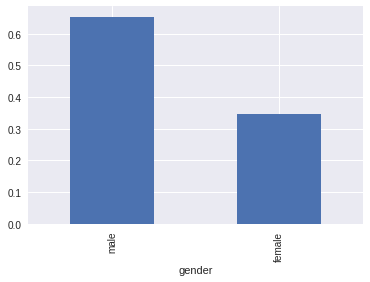

In [136]:
per_authors_by_gender.plot.bar()

## Papers

### Citations per paper

In [137]:
authors['total_citations'].describe()

count    100790.000000
mean         68.890991
std         282.993017
min           0.000000
25%           6.000000
50%          19.000000
75%          50.000000
max       24962.000000
Name: total_citations, dtype: float64

### Author with max number of citations

In [138]:
authors[authors['total_citations']==max(authors['total_citations'])]

,id,name,gender,papers,total_citations,papers_as_first_author,papers_as_last_author,papers_with_citations,h-index
7298,7299,Richard Durbin,male,21,24962,1,0,20,16


### Top-10 Most cited authors

In [139]:
authors.sort_values('total_citations', inplace=True, ascending=False)
authors[['name','gender','total_citations']].head(10)

,name,gender,total_citations
7298,Richard Durbin,male,24962
119245,Goncalo R Abecasis,male,22031
16979,Alexandros Stamatakis,male,12752
3204,Peer Bork,male,12624
25815,Minoru Kanehisa,male,10150
51102,Jue Ruan,female,9984
21503,Nils Homer,male,9827
113603,Tim Fennell,male,9821
33544,Gabor Marth,male,9782
115238,Bob Handsaker,male,9753


#### Top-10 most cited female authors

In [35]:
authors.sort_values('total_citations', inplace=True, ascending=False)
authors[authors['gender']=='female'][['name','gender','total_citations']].head(10)

,name,gender,total_citations
51102,Jue Ruan,female,9984
76793,Miho Furumichi,female,5232
76794,Mao Tanabe,female,5232
21794,Fiona Cunningham,female,4685
84281,Narmada Thanki,female,4501
84270,Myra K Derbyshire,female,4446
84278,Gabriele H Marchler,female,4446
84282,Roxanne A Yamashita,female,4446
84272,Noreen R Gonzales,female,4446
72241,Donna R Maglott,female,4408


### Papers per author

In [140]:
authors['papers'].describe()

count    100790.000000
mean          1.744181
std           2.037485
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          69.000000
Name: papers, dtype: float64

### Top-10 Most productive author

In [141]:
authors.sort_values('papers', inplace=True, ascending=False)
authors[['name','gender','papers']].head(10)

,name,gender,papers
3213,Janusz M Bujnicki,male,69
7970,Peter F Stadler,male,69
3204,Peer Bork,male,53
4050,Alfonso Valencia,male,51
1923,Jun Wang,male,48
265,Philip E Bourne,male,48
3380,Mark Gerstein,male,46
3087,Yan Zhang,male,45
67606,Christine Anne Orengo,female,44
9368,Rolf Backofen,male,41


#### Top-10 most productive female authors

In [142]:
authors.sort_values('papers', inplace=True, ascending=False)
authors[authors['gender']=='female'][['name','gender','papers']].head(10)

,name,gender,papers
67606,Christine Anne Orengo,female,44
763,Olga G Troyanskaya,female,35
17171,Rita Casadio,female,34
1829,Luonan Chen,female,32
62,Jin Wang,female,30
17135,Sophia Ananiadou,female,29
107,Ruth Nussinov,female,29
17500,Lin Liu,female,28
2421,Shoba Ranganathan,female,28
13405,Cathy H Wu,female,26


### H-Index

The **`h-index`** is computed based <u>only</u> on the papers available of the dataset

In [143]:
authors['h-index'].describe()

count    100790.000000
mean          1.486874
std           1.443448
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          32.000000
Name: h-index, dtype: float64

### Top-10 most impactful author

In [144]:
authors.sort_values('h-index', inplace=True, ascending=False)
authors[['name','gender','papers','total_citations','h-index']].head(10)

,name,gender,papers,total_citations,h-index
3204,Peer Bork,male,53,12624,32
7970,Peter F Stadler,male,69,3420,30
25815,Minoru Kanehisa,male,31,10150,25
265,Philip E Bourne,male,48,3171,25
3380,Mark Gerstein,male,46,2202,25
8629,Ewan Birney,male,32,7033,25
3994,David S Wishart,male,37,9711,25
120826,William Stafford Noble,male,40,4243,24
3213,Janusz M Bujnicki,male,69,2193,23
2643,Alex Bateman,male,34,7283,23


#### Top-10 most impacful female authors

In [145]:
authors.sort_values('h-index', inplace=True, ascending=False)
authors[authors['gender']=='female'][['name','gender','papers','total_citations','h-index']].head(10)

,name,gender,papers,total_citations,h-index
763,Olga G Troyanskaya,female,35,1473,20
20017,Helen Parkinson,female,23,2892,18
17135,Sophia Ananiadou,female,29,754,18
107,Ruth Nussinov,female,29,1656,17
1829,Luonan Chen,female,32,976,17
13405,Cathy H Wu,female,26,3676,17
67606,Christine Anne Orengo,female,44,4233,16
18627,Drena Dobbs,female,17,1008,16
2231,Janet M Thornton,female,23,1516,16
338,Ivet Bahar,female,24,1097,16


### Papers as first author

In [146]:
authors['papers_as_first_author'].describe()

count    100790.000000
mean          4.608086
std         101.942500
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max       22031.000000
Name: papers_as_first_author, dtype: float64

### Top-10 authors that appeared as first author

In [147]:
authors.sort_values('papers_as_first_author', inplace=True, ascending=False)
authors[['name','gender','papers','papers_as_first_author']].head(10)

,name,gender,papers,papers_as_first_author
119245,Goncalo R Abecasis,male,6,22031
12428,Robert D Finn,male,27,6329
8836,Timothy L Bailey,male,40,5327
23237,Darren A Natale,male,12,4854
21791,William M McLaren,male,12,4661
67606,Christine Anne Orengo,female,44,4233
24701,Tatiana A Tatusova,female,18,4199
27989,Daniel G Barrell,male,9,4035
59782,Giulietta M Spudich,female,10,3946
9449,Tim J P Hubbard,male,17,3935


#### Top-10 female authors that appeared as first author

In [45]:
authors.sort_values('papers_as_first_author', inplace=True, ascending=False)
authors[authors['gender']=='female'][['name','gender','papers','papers_as_first_author']].head(10)

,name,gender,papers,papers_as_first_author
67606,Christine Anne Orengo,female,44,4233
24701,Tatiana A Tatusova,female,18,4199
59782,Giulietta M Spudich,female,10,3946
38621,Jennifer L Harrow,female,13,3126
101697,Louise C Daugherty,female,5,2711
84901,Brooke L Rhead,female,10,2700
104439,Charlotte G Cole,female,4,2496
22799,Artemis G Hatzigeorgiou,female,16,2360
9769,Melissa S Cline,female,11,2290
81677,Belinda M Giardine,female,6,2178


### Papers as last author

In [46]:
authors['papers_as_last_author'].describe()

count    100790.000000
mean          0.074363
std           0.431288
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          20.000000
Name: papers_as_last_author, dtype: float64

### Top-10 authors that appeared as first author

In [47]:
authors.sort_values('papers_as_last_author', inplace=True, ascending=False)
authors[['name','gender','papers','papers_as_last_author']].head(10)

,name,gender,papers,papers_as_last_author
265,Philip E Bourne,male,48,20
6591,Mark B Gerstein,male,22,14
763,Olga G Troyanskaya,female,35,12
17135,Sophia Ananiadou,female,29,11
155,Alan S Perelson,male,18,11
1437,Eugene I Shakhnovich,male,17,11
62,Jin Wang,female,30,10
2421,Shoba Ranganathan,female,28,10
7447,David T Jones,male,22,10
398,Ned S Wingreen,male,12,10


#### Top-10 female authors that appeared as first author

In [48]:
authors.sort_values('papers_as_last_author', inplace=True, ascending=False)
authors[authors['gender']=='female'][['name','gender','papers','papers_as_last_author']].head(10)

,name,gender,papers,papers_as_last_author
763,Olga G Troyanskaya,female,35,12
17135,Sophia Ananiadou,female,29,11
62,Jin Wang,female,30,10
2421,Shoba Ranganathan,female,28,10
5018,Lauren Ancel Meyers,female,10,9
1696,Paulien Hogeweg,female,11,8
338,Ivet Bahar,female,24,8
3982,Teresa M Przytycka,female,23,8
3367,Kim T Blackwell,female,8,7
901,Becca Asquith,female,7,7


## Papers without citations

In [49]:
authors['papers_without_citations'] = authors['papers'] - authors['papers_with_citations']
authors[['id','name','gender','papers','papers_without_citations']].head()

,id,name,gender,papers,papers_without_citations
265,266,Philip E Bourne,male,48,1
6591,6592,Mark B Gerstein,male,22,1
763,764,Olga G Troyanskaya,female,35,0
17135,17136,Sophia Ananiadou,female,29,2
155,156,Alan S Perelson,male,18,1


In [50]:
authors['papers_without_citations'].describe()

count    100790.000000
mean          0.115865
std           0.349181
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: papers_without_citations, dtype: float64

# Authorship

## Data structure

In [52]:
papers_authors.head()

,id,title,doi,year,category,author,author_gender,author_position
0,1,A peptide-based method for 13C Metabolic Flux ...,10.1371/journal.pcbi.1003827,2014,Omics > Genomics > Transcriptomics,Amit Ghosh,male,1
1,2,A peptide-based method for 13C Metabolic Flux ...,10.1371/journal.pcbi.1003827,2014,Omics > Genomics > Transcriptomics,Jerome Nilmeier,male,2
2,3,A peptide-based method for 13C Metabolic Flux ...,10.1371/journal.pcbi.1003827,2014,Omics > Genomics > Transcriptomics,Paul D Adams,male,4
3,4,A peptide-based method for 13C Metabolic Flux ...,10.1371/journal.pcbi.1003827,2014,Omics > Genomics > Transcriptomics,Jay D Keasling,male,5
4,5,A peptide-based method for 13C Metabolic Flux ...,10.1371/journal.pcbi.1003827,2014,Omics > Genomics > Transcriptomics,Aindrila Mukhopadhyay,female,6


In [53]:
papers_grouped_by_title = papers_authors.drop(['id', 'doi', 'year', 'category', 'author', 'author_position'], axis=1).groupby(['title','author_gender'], sort=False, as_index=False)
agg_papers_grouped_df = papers_grouped_by_title[['author_gender']].agg({'author_gender': {'count_gender': 'count'}})
agg_papers_grouped_df.head()

/home/jorge/python_venvs/gender_identification/lib/python3.6/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,title,author_gender,count_gender
0,A peptide-based method for 13C Metabolic Flux ...,male,6
1,A peptide-based method for 13C Metabolic Flux ...,female,2
2,Baseline CD4+ T cell counts correlates with HI...,female,2
3,Baseline CD4+ T cell counts correlates with HI...,unknown,4
4,Baseline CD4+ T cell counts correlates with HI...,male,2


In [55]:
papers_gender_dist = agg_papers_grouped_df.pivot(columns='author_gender', values='count_gender', index='title')
papers_gender_dist = papers_gender_dist.drop(['mostly_female', 'mostly_male', 'unknown', 'error_api'], axis=1)
papers_gender_dist = papers_gender_dist.fillna(0)
papers_gender_dist.head()

author_gender,female,male
title,,
'Bois noir' phytoplasma induces significant reprogramming of the leaf transcriptome in the field grown grapevine,3.0,1.0
'Brukin2D': A 2D visualization and comparison tool for LC-MS data,1.0,1.0
'Double water exclusion': A hypothesis refining the O-ring theory for the hot spots at protein interfaces,0.0,0.0
"'Evidence of an auxin signal pathway, microRNA167-ARF8-GH3, and its response to exogenous auxin in cultured rice cells'",1.0,0.0
'Genome design' model and multicellular complexity: Golden middle,0.0,3.0


In [56]:
papers_gender_dist['most_female'] = np.where(papers_gender_dist['female']>papers_gender_dist['male'], 1, 0)
papers_gender_dist['most_male'] = np.where(papers_gender_dist['male']>papers_gender_dist['female'], 1, 0)
papers_gender_dist['equal_gender'] = np.where(papers_gender_dist['male']==papers_gender_dist['female'], 1, 0)
papers_gender_dist['only_male'] = np.where(papers_gender_dist['female']==0, 1, 0)
papers_gender_dist['only_female'] = np.where(papers_gender_dist['male']==0, 1, 0)
papers_gender_dist.head()

author_gender,female,male,most_female,most_male,equal_gender,only_male,only_female
title,,,,,,,
'Bois noir' phytoplasma induces significant reprogramming of the leaf transcriptome in the field grown grapevine,3.0,1.0,1,0,0,0,0
'Brukin2D': A 2D visualization and comparison tool for LC-MS data,1.0,1.0,0,0,1,0,0
'Double water exclusion': A hypothesis refining the O-ring theory for the hot spots at protein interfaces,0.0,0.0,0,0,1,1,1
"'Evidence of an auxin signal pathway, microRNA167-ARF8-GH3, and its response to exogenous auxin in cultured rice cells'",1.0,0.0,1,0,0,0,1
'Genome design' model and multicellular complexity: Golden middle,0.0,3.0,0,1,0,1,0


## Papers with mostly male authors

In [404]:
raw_num = papers_gender_dist['most_male'].sum()
per_num = round(raw_num/papers_gender_dist.shape[0]*100,2)
print('There are {}({}%) papers which have mostly male authors'.format(raw_num, per_num))

There are 12870(56.23%) papers which have mostly male authors


## Papers with mostly female authors

In [405]:
raw_num = papers_gender_dist['most_female'].sum()
per_num = round(raw_num/papers_gender_dist.shape[0]*100,2)
print('There are {}({}%) papers which have mostly female authors'.format(raw_num, per_num))

There are 6411(28.01%) papers which have mostly female authors


## Papers with only male authors

In [406]:
raw_num = papers_gender_dist['only_male'].sum()
per_num = round(raw_num/papers_gender_dist.shape[0]*100,2)
print('There are {}({}%) papers which have only male authors'.format(raw_num, per_num))

There are 8453(36.93%) papers which have only male authors


## Papers with only female authors

In [407]:
raw_num = papers_gender_dist['only_female'].sum()
per_num = round(raw_num/papers_gender_dist.shape[0]*100,2)
print('There are {}({}%) papers which have only female authors'.format(raw_num, per_num))

There are 1916(8.37%) papers which have only female authors


## Papers with equal number of male and female authors

In [408]:
raw_num = papers_gender_dist['equal_gender'].sum()
per_num = round(raw_num/papers_gender_dist.shape[0]*100,2)
print('There are {}({}%) papers which have equal number of male and female authors'.format(raw_num, per_num))

There are 3607(15.76%) papers which have equal number of male and female authors


## Distribution of first author genders

In [353]:
papers_authors[papers_authors['author_position']==1].author_gender.value_counts()/papers.shape[0]

male             0.543017
female           0.248161
unknown          0.190040
mostly_male      0.004383
mostly_female    0.002191
Name: author_gender, dtype: float64

## Number of papers with a woman as first author

In [354]:
raw_num = papers_authors[(papers_authors['author_gender']=='female')&(papers_authors['author_position']==1)].shape[0]
per_num = round(raw_num/papers.shape[0]*100,2)
print('There are {}({}%) papers which have a woman as the first author'.format(raw_num, per_num))

There are 9513(24.82%) papers which have a woman as the first author


## Number of papers with a man as first author

In [355]:
raw_num = papers_authors[(papers_authors['author_gender']=='male')&(papers_authors['author_position']==1)].shape[0]
per_num = round(raw_num/papers.shape[0]*100,2)
print('There are {}({}%) papers which have a man as the first author'.format(raw_num, per_num))

There are 20816(54.3%) papers which have a man as the first author


## Evolution of male and female authors by year

In [356]:
papers_grouped_by_year = papers_authors.drop(['id', 'title', 'doi', 'category', 'author', 'author_position'], axis=1).\
    groupby(['year','author_gender'], as_index=False)
agg_papers_grouped_df = papers_grouped_by_year[['author_gender']].agg({'author_gender': {'count_gender': 'count'}})

In [357]:
papers_gender_dist = agg_papers_grouped_df.pivot(columns='author_gender', values='count_gender', index='year')
papers_gender_dist = papers_gender_dist.drop(['error_api', 'mostly_female', 'mostly_male', 'unknown'], axis=1)
papers_gender_dist = papers_gender_dist.fillna(0)
papers_gender_dist.head()

author_gender,female,male
year,,
2000,2.0,1.0
2001,1.0,1.0
2002,53.0,142.0
2003,98.0,266.0
2004,281.0,843.0


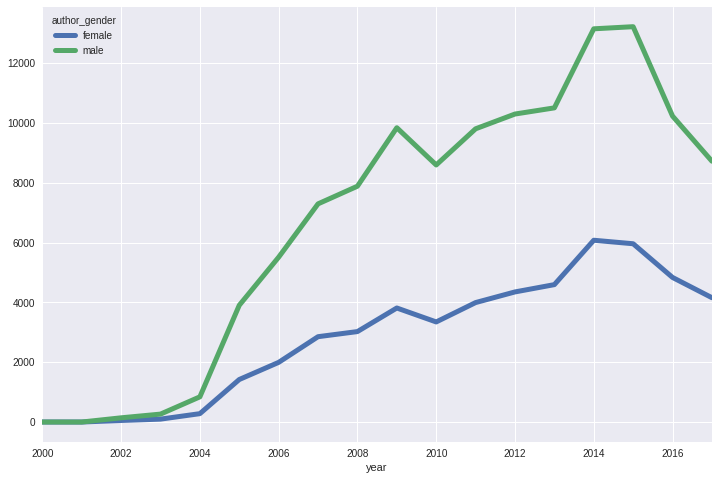

In [358]:
papers_gender_dist.plot(lw=5)
plt.gcf().set_size_inches(12, 8)

## Position in papers of female authors

In [359]:
# filter out male authors
female_authors = papers_authors[papers_authors['author_gender']=='female']
# drop unneccesary columns
female_authors = female_authors.drop(['id', 'title', 'doi', 'year', 'category', 'author_gender'], axis=1)
# group rows authors by author
female_authors_grouped_by_position = female_authors.groupby(['author','author_position'], as_index=False)
# compute frequency of positions
agg_fa_grouped_df = female_authors_grouped_by_position[['author_position']].\
    agg({'author_position': {'count_position': 'count'}})
# pivot table
female_authors_pos = agg_fa_grouped_df.pivot(columns='author_position', values='count_position', index='author')
# fill na values with zero
female_authors_pos = female_authors_pos.fillna(0)
female_authors_pos.head()

author_position,1,2,3,4,5,6,7,8,9,10,...,92,93,95,103,107,117,118,120,126,129
author,,,,,,,,,,,,,,,,,,,,,
A A Fedorova,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bendoraite,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A K Shchyolkina,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A V Lapuk,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A-Lien Lu,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [360]:
female_authors_pos['freq_pos'] = female_authors_pos.idxmax(axis=1)  #.value_counts()[:10]

In [361]:
female_authors_pos[female_authors_pos['freq_pos']==1].head(10)

author_position,1,2,3,4,5,6,7,8,9,10,...,93,95,103,107,117,118,120,126,129,freq_pos
author,,,,,,,,,,,,,,,,,,,,,
Aafke A van den Berg,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aafke W F Janssen,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aakrosh Ratan,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aamira Tariq,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aanchal Katoch,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aarti Garg,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Aarti Sevilimedu,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Abbey B Holt,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Abha Singh Bais,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Positions most frequently occuped by female authors in papres

In [362]:
female_authors_pos['freq_pos'].value_counts()[:10]

1     7656
2     6749
3     5581
4     4244
5     2972
6     2155
7     1514
8      984
9      680
10     477
Name: freq_pos, dtype: int64

In [363]:
title_papers_led_female = papers_authors[(papers_authors['author_gender']=='female') & \
                                         (papers_authors['author_position']==1)]['title']
papers_led_female = papers_authors[papers_authors['title'].isin(title_papers_led_female)]
papers_led_female = papers_led_female.drop(['id', 'doi', 'year', 'category', 'author', 'author_position'], axis=1)
papers_led_female_grouped_by_title = papers_led_female.groupby(['title','author_gender'], \
                                                               sort=False, as_index=False)
agg_papers_grouped_lbf = papers_led_female_grouped_by_title[['author_gender']].\
    agg({'author_gender': {'count_gender': 'count'}})
papers_led_female_df = agg_papers_grouped_lbf.pivot(columns='author_gender', values='count_gender', index='title') 
papers_led_female_df = papers_led_female_df.drop(['error_api', 'mostly_female', 'mostly_male'], axis=1)
papers_led_female_df = papers_led_female_df.fillna(0)
num_papers_led_by_woman = papers_led_female_df.shape[0]
per_papers_led_by_woman = round(num_papers_led_by_woman/papers.shape[0]*100,2)
print('There are {} ({}%) papers led by a woman'.format(num_papers_led_by_woman, per_papers_led_by_woman))
num_papers_led_by_woman_men = papers_led_female_df[papers_led_female_df['male']>0].shape[0]
per_papers_led_by_woman_men = round(num_papers_led_by_woman_men/num_papers_led_by_woman*100,2)
print('In {} ({}%) of this papers there are also men as co-authors'.format(num_papers_led_by_woman_men, \
                                                                          per_papers_led_by_woman_men))

There are 9513 (24.82%) papers led by a woman
In 8706 (91.52%) of this papers there are also men as co-authors


## Citations by gender

### Citations of papers with mostly female and male authors

In [532]:
papers_with_most_females = papers_gender_dist[papers_gender_dist['most_female']==1].index.values
c_mostly_female_authors = papers[papers['title'].isin(papers_with_most_females)]['citations']
papers_with_most_male = papers_gender_dist[papers_gender_dist['most_male']==1].index.values
c_mostly_male_authors = papers[papers['title'].isin(papers_with_most_male)]['citations']

In [533]:
c_mostly_female_authors.describe()

count    6411.000000
mean       26.008891
std        72.203477
min         0.000000
25%         4.000000
50%        12.000000
75%        28.000000
max      2406.000000
Name: citations, dtype: float64

In [534]:
c_mostly_male_authors.describe()

count    12870.000000
mean        27.649650
std         77.241824
min          0.000000
25%          4.000000
50%         12.000000
75%         29.000000
max       3212.000000
Name: citations, dtype: float64

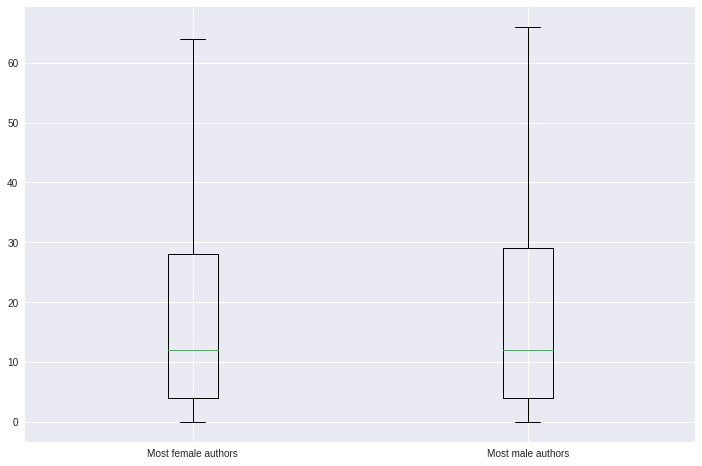

In [537]:
data_to_plot = [c_mostly_female_authors, c_mostly_male_authors]
# Create a figure instance
fig = plt.figure(1, figsize=(12, 8))
# Create an axes instance
ax = fig.add_subplot(111)
ax.set_xticklabels(['Most female authors', 'Most male authors'])
# Create the boxplot
bp = ax.boxplot(data_to_plot, showfliers=False)

#### Are the different statistically significant?

In [549]:
ttest,pval = ttest_ind(c_mostly_female_authors,c_mostly_male_authors)
if pval < 0.05:
    print("The difference is statistically significant, p-value:",round(pval,3))
else:
    print("The difference is not statistically significant, p-value:",round(pval,3))

The difference is not statistically significant, p-value: 0.156


### Citations of papers with only female and male authors

In [538]:
papers_with_most_females = papers_gender_dist[papers_gender_dist['only_female']==1].index.values
c_only_female_authors = papers[papers['title'].isin(papers_with_most_females)]['citations']
papers_with_most_male = papers_gender_dist[papers_gender_dist['only_male']==1].index.values
c_only_male_authors = papers[papers['title'].isin(papers_with_most_male)]['citations']

In [540]:
c_only_female_authors.describe()

count    1916.000000
mean       20.803236
std        65.790850
min         0.000000
25%         3.000000
50%         9.000000
75%        23.000000
max      2006.000000
Name: citations, dtype: float64

In [541]:
c_only_male_authors.describe()

count    8453.000000
mean       27.821602
std        82.839307
min         0.000000
25%         4.000000
50%        12.000000
75%        29.000000
max      3212.000000
Name: citations, dtype: float64

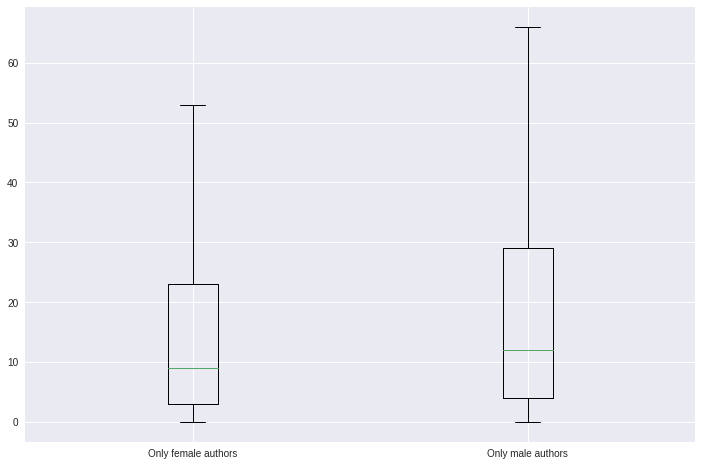

In [539]:
data_to_plot = [c_only_female_authors, c_only_male_authors]
# Create a figure instance
fig = plt.figure(1, figsize=(12, 8))
# Create an axes instance
ax = fig.add_subplot(111)
ax.set_xticklabels(['Only female authors', 'Only male authors'])
# Create the boxplot
bp = ax.boxplot(data_to_plot, showfliers=False)

#### Are the different statistically significant?

In [550]:
ttest,pval = ttest_ind(c_only_female_authors,c_only_male_authors)
if pval < 0.05:
    print("The difference is statistically significant, p-value:",round(pval,3))
else:
    print("The difference is not statistically significant, p-value:",round(pval,3))

The difference is statistically significant, p-value: 0.001


### Citations of papers led by female and male authors

In [558]:
# citations led by female authors
c_led_female_authors = papers[papers['title'].isin(papers_led_female_df.index.values)]['citations']
# citations led by male authors
title_papers_led_male = papers_authors[(papers_authors['author_gender']=='male') & \
                                       (papers_authors['author_position']==1)]['title']
papers_led_male = papers_authors[papers_authors['title'].isin(title_papers_led_male)]
papers_led_male = papers_led_male.drop(['id', 'doi', 'year', 'category', 'author', 'author_position'], axis=1)
papers_led_male_grouped_by_title = papers_led_male.groupby(['title','author_gender'], sort=False, as_index=False)
agg_papers_grouped_lbm = papers_led_male_grouped_by_title[['author_gender']].\
    agg({'author_gender': {'count_gender': 'count'}})
papers_led_male_df = agg_papers_grouped_lbm.pivot(columns='author_gender', values='count_gender', index='title')
c_led_male_authors = papers[papers['title'].isin(papers_led_male_df.index.values)]['citations']

In [559]:
c_led_female_authors.describe()

count    9513.000000
mean       27.985388
std        78.463576
min         0.000000
25%         4.000000
50%        12.000000
75%        29.000000
max      2686.000000
Name: citations, dtype: float64

In [560]:
c_led_male_authors.describe()

count    12364.000000
mean        30.306859
std         93.288278
min          0.000000
25%          4.000000
50%         13.000000
75%         30.000000
max       3212.000000
Name: citations, dtype: float64

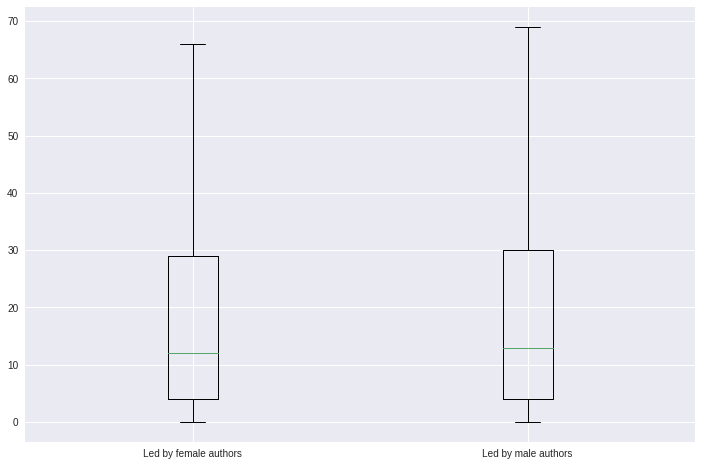

In [561]:
data_to_plot = [c_led_female_authors, c_led_male_authors]
# Create a figure instance
fig = plt.figure(1, figsize=(12, 8))
# Create an axes instance
ax = fig.add_subplot(111)
ax.set_xticklabels(['Led by female authors', 'Led by male authors'])
# Create the boxplot
bp = ax.boxplot(data_to_plot, showfliers=False)

#### Are the different statistically significant?

In [562]:
ttest,pval = ttest_ind(c_led_female_authors,c_led_male_authors)
if pval < 0.05:
    print("The difference is statistically significant, p-value:",round(pval,3))
else:
    print("The difference is not statistically significant, p-value:",round(pval,3))

The difference is not statistically significant, p-value: 0.051


### Citations of papers with female and male authors as last authors

In [576]:
citations_papers_female_author = papers[papers['gender_last_author']=='female']['citations']
citations_papers_male_author = papers[papers['gender_last_author']=='male']['citations']

In [577]:
citations_papers_female_author.describe()

count    6680.000000
mean       26.902096
std        72.256484
min         0.000000
25%         4.000000
50%        12.000000
75%        27.000000
max      2115.000000
Name: citations, dtype: float64

In [578]:
citations_papers_male_author.describe()

count    25902.000000
mean        35.978843
std        148.681350
min          0.000000
25%          5.000000
50%         14.000000
75%         32.000000
max       9753.000000
Name: citations, dtype: float64

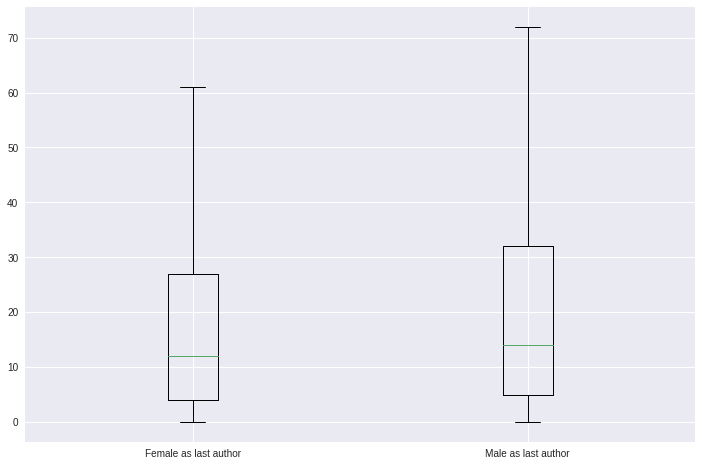

In [579]:
data_to_plot = [citations_papers_female_author, citations_papers_male_author]
# Create a figure instance
fig = plt.figure(1, figsize=(12, 8))
# Create an axes instance
ax = fig.add_subplot(111)
ax.set_xticklabels(['Female as last author', 'Male as last author'])
# Create the boxplot
bp = ax.boxplot(data_to_plot, showfliers=False)

#### Are the different statistically significant?

In [583]:
ttest,pval = ttest_ind(citations_papers_female_author, citations_papers_male_author)
if pval < 0.05:
    print("The difference is statistically significant, p-value:",pval)
else:
    print("The difference is not statistically significant, p-value:",round(pval,3))

The difference is statistically significant, p-value: 1.2772595621891377e-06


### Correlation between citations and gender distribution

In [586]:
papers_gender_dist['gender_ratio'] = papers_gender_dist['female']/papers_gender_dist['male']

In [599]:
papers.shape[0]

38350

In [600]:
papers_gender_dist.shape[0]

22888

In [598]:
papers_gdr = pd.DataFrame({'title': papers_gender_dist.index.values, 
                           'gender_ratio':papers_gender_dist['gender_ratio']},
                         index=papers.index.values)

ValueError: Shape of passed values is (22888, 2), indices imply (38350, 2)

In [596]:
papers_gdr.head()

,title,gender_ratio
title,,
'Bois noir' phytoplasma induces significant reprogramming of the leaf transcriptome in the field grown grapevine,'Bois noir' phytoplasma induces significant re...,1.500000
'Brukin2D': A 2D visualization and comparison tool for LC-MS data,'Brukin2D': A 2D visualization and comparison ...,0.166667
'HypothesisFinder:' A Strategy for the Detection of Speculative Statements in Scientific Text,'HypothesisFinder:' A Strategy for the Detecti...,1.000000
'In-line attack' conformational effect plays a modest role in an enzyme-catalyzed RNA cleavage: A free energy simulation study,'In-line attack' conformational effect plays a...,NaN
'PACLIMS': A component LIM system for high-throughput functional genomic analysis,'PACLIMS': A component LIM system for high-thr...,2.000000


In [ ]:
plt.scatter(papers_gender_dist['gender_ratio'], papers_gender_dist['citations'], s=area, c=colors, alpha=0.5)